(50000, 32, 32, 3)

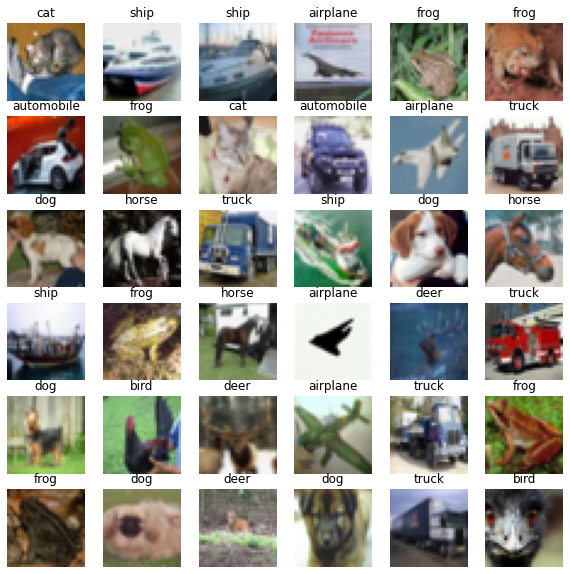

In [2]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
(trainX, trainY), (testX, testY) = cifar10.load_data()

trainX = trainX / 255.0
testX = testX / 255.0

plt.figure(figsize=(10, 10))
for i in range(36):
    ax = plt.subplot(6,6,i+1)
    plt.imshow(testX[i])
    plt.title(class_names[testY[i].item(0)]) 
    plt.axis("off")
    
trainX.shape

In [3]:
from tensorflow import keras
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, Activation

model = keras.Sequential()
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.6))  
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(class_names)))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [4]:
model.compile(
    optimizer=keras.optimizers.Adam(0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

hist = model.fit(trainX, 
                 trainY, 
                 epochs=10,
                 validation_split=0.2,
                 verbose=1)

Epoch 1/10
1250/1250 [==============================] - 75s 59ms/step - loss: 1.6171 - sparse_categorical_accuracy: 0.4059 - val_loss: 1.3205 - val_sparse_categorical_accuracy: 0.5329
Epoch 2/10
1250/1250 [==============================] - 77s 62ms/step - loss: 1.3259 - sparse_categorical_accuracy: 0.5222 - val_loss: 1.2100 - val_sparse_categorical_accuracy: 0.5662
Epoch 3/10
1250/1250 [==============================] - 76s 61ms/step - loss: 1.2140 - sparse_categorical_accuracy: 0.5630 - val_loss: 1.0581 - val_sparse_categorical_accuracy: 0.6277
Epoch 4/10
1250/1250 [==============================] - 73s 58ms/step - loss: 1.1332 - sparse_categorical_accuracy: 0.5968 - val_loss: 1.0058 - val_sparse_categorical_accuracy: 0.6481
Epoch 5/10
1250/1250 [==============================] - 74s 59ms/step - loss: 1.0753 - sparse_categorical_accuracy: 0.6179 - val_loss: 1.0301 - val_sparse_categorical_accuracy: 0.6407
Epoch 6/10
1250/1250 [==============================] - 75s 60ms/step - loss: 1.

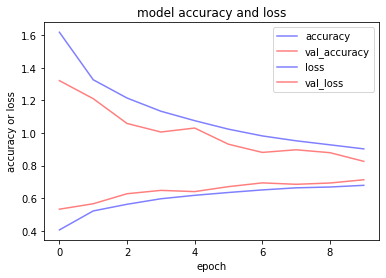

In [5]:
plt.plot(hist.history['sparse_categorical_accuracy'], 'b', alpha = 0.5, label = 'accuracy')
plt.plot(hist.history['val_sparse_categorical_accuracy'], 'r', alpha = 0.5, label = 'val_accuracy')
plt.plot(hist.history['loss'], 'b', alpha = 0.5, label = 'loss')
plt.plot(hist.history['val_loss'], 'r', alpha = 0.5, label = 'val_loss')
plt.title('model accuracy and loss')
plt.ylabel('accuracy or loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [6]:
score = model.evaluate(testX, testY, verbose=0)
print("Test loss:", round(score[0],2))
print("Test accuracy:", round(score[1],2))

# model.save('cifar10_model.h5')

Test loss: 0.85
Test accuracy: 0.7


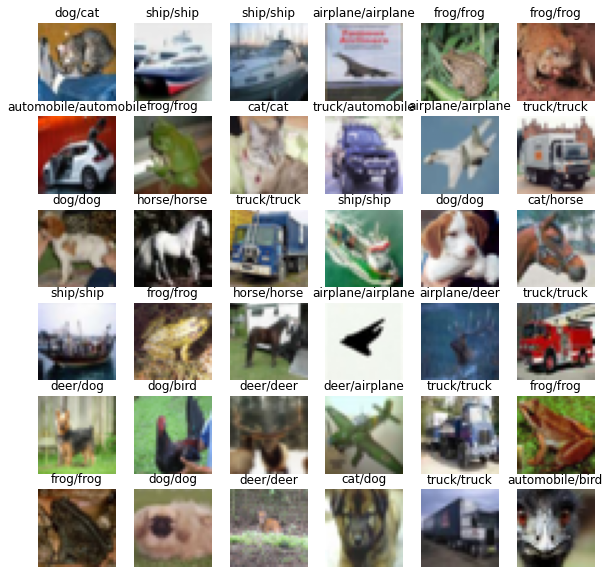

In [7]:
import numpy as np
from tensorflow import keras

# model = keras.models.load_model('cifar10_model.h5')
predictions = model.predict(testX)

plt.figure(figsize=(10, 10))
for i in range(36):
    ax = plt.subplot(6,6,i+1)
    plt.imshow(testX[i])
    plt.title(class_names[np.argmax(predictions[i])]+'/'+class_names[testY[i].item(0)])
    plt.axis("off") 